In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
age_data = pd.read_csv('/Users/blakemyers/Desktop/age_gender.csv')
age_data.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [3]:
def label_age (row):
    if row['age'] > 0 and row['age'] < 8:
        return 0
    elif row['age'] > 7 and row['age'] < 16:
        return 1
    elif row['age'] > 15 and row['age'] < 26:
        return 2
    elif row['age'] > 25 and row['age'] < 36:
        return 3
    elif row['age'] > 35 and row['age'] < 46:
        return 4
    elif row['age'] > 45 and row['age'] < 66:
        return 5
    else:
        return 6

In [4]:
age_data['AgeGroup'] = age_data.apply (lambda row: label_age(row), axis=1)

In [5]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels,AgeGroup
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0


In [6]:
X = []
y = []
for index, row in age_data.iterrows():
    k = row['pixels'].split(" ")
    X.append(np.array(k))
    y.append(row['AgeGroup'])
        
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8/0.9, random_state=42)

In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train = np_utils.to_categorical(y_train, num_classes = 7)
y_valid = np_utils.to_categorical(y_valid, num_classes = 7)
y_test = np_utils.to_categorical(y_test, num_classes = 7)

In [8]:
X_train.shape

(18963, 48, 48, 1)

In [9]:
X_valid.shape

(2371, 48, 48, 1)

In [10]:
X_test.shape

(2371, 48, 48, 1)

In [11]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [12]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,batch_size=32,epochs=30,verbose=1,validation_data=(X_valid, y_valid))

Train on 18963 samples, validate on 2371 samples
Epoch 1/30
18963/18963 [==============================] - 1223s 64ms/step - loss: 1.7946 - accuracy: 0.3142 - val_loss: 1.7212 - val_accuracy: 0.3226
Epoch 2/30
18963/18963 [==============================] - 1287s 68ms/step - loss: 1.5692 - accuracy: 0.3911 - val_loss: 1.3633 - val_accuracy: 0.4479
Epoch 3/30
18963/18963 [==============================] - 1280s 67ms/step - loss: 1.3370 - accuracy: 0.4653 - val_loss: 1.2638 - val_accuracy: 0.4829
Epoch 4/30
18963/18963 [==============================] - 1180s 62ms/step - loss: 1.2206 - accuracy: 0.4964 - val_loss: 1.2026 - val_accuracy: 0.4901
Epoch 5/30
18963/18963 [==============================] - 1160s 61ms/step - loss: 1.1276 - accuracy: 0.5310 - val_loss: 1.1314 - val_accuracy: 0.5377
Epoch 6/30
18963/18963 [==============================] - 1164s 61ms/step - loss: 1.0630 - accuracy: 0.5555 - val_loss: 1.0879 - val_accuracy: 0.5441
Epoch 7/30
18963/18963 [===========================

In [14]:
local_path = '/Users/blakemyers/Desktop/Jupyter/DeepLearning2021/TrainedAge2021VGG16'
model.save(local_path)

In [15]:
Y_test = np.argmax(y_test, axis=1)
y_pred = model.predict_classes(X_test)
target_names = ['1-7', '8-15', '16-25', '26-35', '36-45', '46-65', '66-116']
print(classification_report(Y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

         1-7       0.96      0.84      0.89       241
        8-15       0.60      0.58      0.59       121
       16-25       0.47      0.54      0.50       367
       26-35       0.55      0.61      0.58       735
       36-45       0.31      0.26      0.28       305
       46-65       0.58      0.57      0.57       429
      66-116       0.72      0.53      0.61       173

    accuracy                           0.56      2371
   macro avg       0.60      0.56      0.58      2371
weighted avg       0.57      0.56      0.56      2371



In [16]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
print(cm)

[[202  26   9   2   1   1   0]
 [  9  70  26   9   2   5   0]
 [  0   8 197 151  10   1   0]
 [  0   7 161 449  84  34   0]
 [  0   1  17 135  80  70   2]
 [  0   2  10  64  76 244  33]
 [  0   2   1   5   8  66  91]]


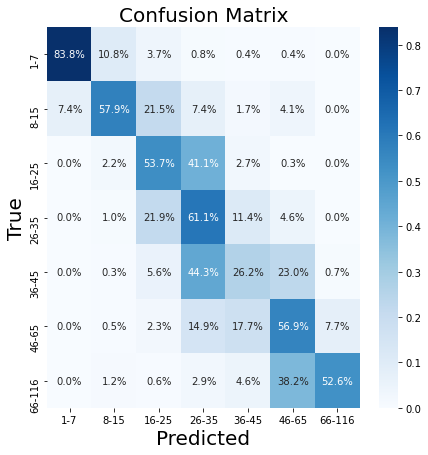

In [18]:
fig,ax= plt.subplots(figsize=(7,7))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(target_names, size=10); \
ax.yaxis.set_ticklabels(target_names, size=10);